# Práctica 2. Multi-layer Perceptron 

In [1]:

from keras.datasets import mnist
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.astype("float64")/255.0
train_X = train_X.reshape((60000, (28*28)))

test_X = test_X.astype("float64")/255.0
test_X = test_X.reshape((10000, (28*28)))

In [3]:
from sklearn.linear_model import Perceptron

p = Perceptron(random_state=32, max_iter=100, tol=0.0001)

p.fit(X=train_X, y=train_y)

error_rate = (1 - p.score(X=test_X, y=test_y)) * 100

print(error_rate)



12.660000000000004


In [64]:
print(p.coef_.shape)
print(p.coef_)

(10, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from sklearn.neural_network import MLPClassifier

b_size = 512

mlc = MLPClassifier(
    random_state=123,
    hidden_layer_sizes=(800, 600),
    batch_size=b_size,
    activation="relu",
    solver="adam",
    max_iter=100,
    early_stopping=False,
    verbose=True
)

mlc.fit(X=train_X, y=train_y)

Iteration 1, loss = 0.29673515
Iteration 2, loss = 0.10013119
Iteration 3, loss = 0.06081659
Iteration 4, loss = 0.03974385
Iteration 5, loss = 0.02938005
Iteration 6, loss = 0.02322557
Iteration 7, loss = 0.01298365
Iteration 8, loss = 0.00952077
Iteration 9, loss = 0.00519296
Iteration 10, loss = 0.00589857
Iteration 11, loss = 0.00331291
Iteration 12, loss = 0.00242425
Iteration 13, loss = 0.00779731
Iteration 14, loss = 0.01356458
Iteration 15, loss = 0.01290037
Iteration 16, loss = 0.01008319
Iteration 17, loss = 0.00728163
Iteration 18, loss = 0.00769466
Iteration 19, loss = 0.00576293
Iteration 20, loss = 0.00132369
Iteration 21, loss = 0.00070209
Iteration 22, loss = 0.00040855
Iteration 23, loss = 0.00035783
Iteration 24, loss = 0.00034422
Iteration 25, loss = 0.00033477
Iteration 26, loss = 0.00032840
Iteration 27, loss = 0.00032255
Iteration 28, loss = 0.00031806
Iteration 29, loss = 0.00031423
Iteration 30, loss = 0.00031064
Iteration 31, loss = 0.00030727
Iteration 32, los

MLPClassifier(batch_size=512, hidden_layer_sizes=(800, 600), max_iter=100,
              random_state=123, verbose=True)

98.55000000000001
1.4499999999999957
0


ValueError: x, y, and format string must not be None

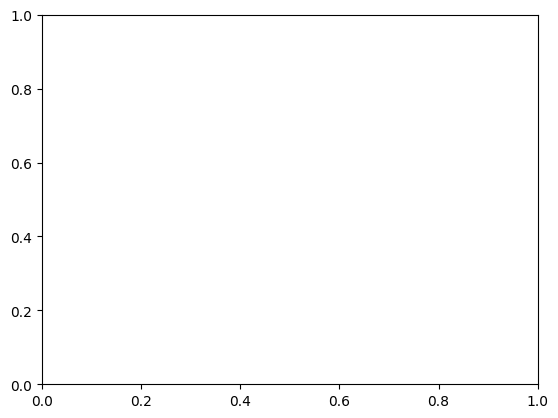

In [9]:
print(mlc.score(X=test_X, y=test_y)*100)

print((1 - mlc.score(X=test_X, y=test_y))*100)

print(np.argmax(mlc.validation_scores_))

import matplotlib.pyplot as plt

plt.plot(mlc.validation_scores_)

plt.show()




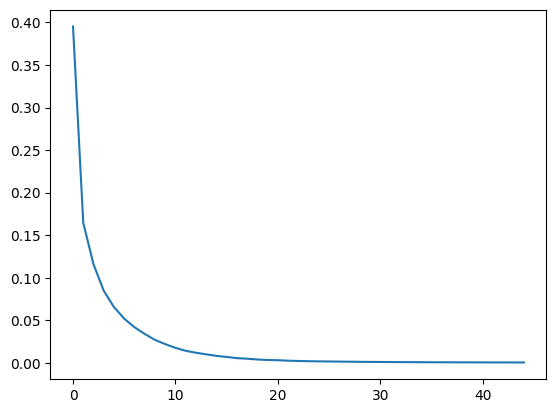

In [7]:
plt.plot(mlc.loss_curve_)
plt.show()

In [ ]:
imp = np.array(mlc.validation_scores_[32:43]) - mlc.best_validation_score_

print(imp)

print(imp > 0.0001)

import matplotlib.pyplot as plt



fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 12))

ax[0].plot(mlc.loss_curve_[30:])
ax[0].set_title('Loss')
 
ax[1].plot(mlc.validation_scores_[30:])
ax[1].set_title('Validation score')
plt.xticks(ticks=list(range(15)), labels=list(range(30, mlc.n_iter_)))

fig.suptitle("Performance over epochs", fontsize=14)


plt.show()


In [53]:
list(range(10, 20, 1))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]